<a href="https://colab.research.google.com/github/gokremtekir/Python-Ornekleri/blob/main/House_Estimate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('houses.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [24]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## Tahmin edilmesi gereken veri: Fiyat

### Obje olan verileri ve tarih olan veriyi attık.

In [25]:
df1 = df.drop(columns = ["date", "yr_renovated", "street", "city", "statezip", "country"])
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976


In [26]:
print(df1.columns.tolist())

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built']


## Model Kurma

In [27]:
print(df1.columns.isnull())

[False False False False False False False False False False False False]


In [28]:
y = df1["price"]
x = df1.drop("price", axis = 1)

In [29]:
lm = LinearRegression()
model = lm.fit(x, y)

In [30]:
model.score(x, y)

0.21770092051831125

               bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
bedrooms       1.000000   0.545920     0.594884  0.068819  0.177895   
bathrooms      0.545920   1.000000     0.761154  0.107837  0.486428   
sqft_living    0.594884   0.761154     1.000000  0.210538  0.344850   
sqft_lot       0.068819   0.107837     0.210538  1.000000  0.003750   
floors         0.177895   0.486428     0.344850  0.003750  1.000000   
waterfront    -0.003483   0.076232     0.117616  0.017241  0.022024   
view           0.111028   0.211960     0.311009  0.073907  0.031211   
condition      0.025080  -0.119994    -0.062826  0.000558 -0.275013   
sqft_above     0.484705   0.689918     0.876443  0.216455  0.522814   
sqft_basement  0.334165   0.298020     0.447206  0.034842 -0.255510   
yr_built       0.142461   0.463498     0.287775  0.050706  0.467481   
price          0.200336   0.327110     0.430410  0.050451  0.151461   

               waterfront      view  condition  sqft_above  sqft_basement  \

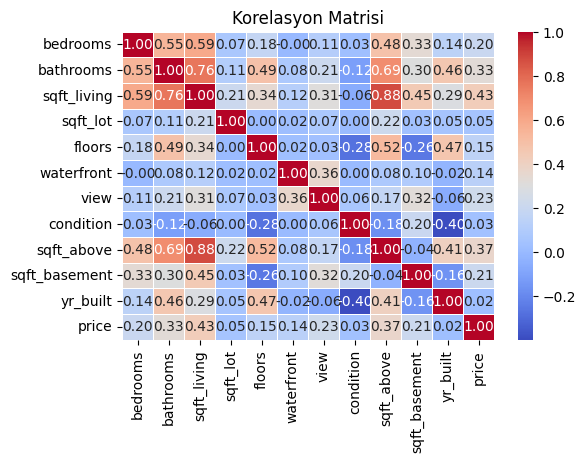

In [31]:
correlation_matrix = pd.concat([x, y], axis=1).corr()
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasyon Matrisi")
plt.show()